# Data Collection

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Response Variable
CPI_df = pd.read_excel('CPIAUCSL.xlsx') #CPI for all urban customers

In [ ]:
print(CPI_df)

    observation_date  CPIAUCSL
0         1947-01-01    21.480
1         1947-02-01    21.620
2         1947-03-01    22.000
3         1947-04-01    22.000
4         1947-05-01    21.950
..               ...       ...
932       2024-09-01   314.851
933       2024-10-01   315.564
934       2024-11-01   316.449
935       2024-12-01   317.603
936       2025-01-01   319.086

[937 rows x 2 columns]


In [ ]:
# Predictor variables
FEDFUNDS_df = pd.read_excel('FEDFUNDS.xlsx')
GDP_df = pd.read_excel('GDPC1.xlsx')
M2SL_df = pd.read_excel('M2SL.xlsx')
M2V_df = pd.read_excel('M2V.xlsx')
DCOILBRENT_df = pd.read_excel('DCOILBRENTEU.xlsx')

In [ ]:
print(GDP_df)

    observation_date      GDPC1
0         1947-01-01   2182.681
1         1947-04-01   2176.892
2         1947-07-01   2172.432
3         1947-10-01   2206.452
4         1948-01-01   2239.682
..               ...        ...
307       2023-10-01  22960.600
308       2024-01-01  23053.545
309       2024-04-01  23223.906
310       2024-07-01  23400.294
311       2024-10-01  23536.293

[312 rows x 2 columns]


In [ ]:
print(FEDFUNDS_df)

    observation_date  FEDFUNDS
0         1954-07-01      0.80
1         1954-08-01      1.22
2         1954-09-01      1.07
3         1954-10-01      0.85
4         1954-11-01      0.83
..               ...       ...
842       2024-09-01      5.13
843       2024-10-01      4.83
844       2024-11-01      4.64
845       2024-12-01      4.48
846       2025-01-01      4.33

[847 rows x 2 columns]


In [ ]:
print(M2SL_df)

    observation_date     M2SL
0         1959-01-01    286.6
1         1959-02-01    287.7
2         1959-03-01    289.2
3         1959-04-01    290.1
4         1959-05-01    292.2
..               ...      ...
788       2024-09-01  21252.4
789       2024-10-01  21332.7
790       2024-11-01  21465.8
791       2024-12-01  21549.3
792       2025-01-01  21561.4

[793 rows x 2 columns]


In [ ]:
print(M2V_df)

    observation_date    M2V
0         1959-01-01  1.773
1         1959-04-01  1.789
2         1959-07-01  1.773
3         1959-10-01  1.779
4         1960-01-01  1.817
..               ...    ...
259       2023-10-01  1.366
260       2024-01-01  1.375
261       2024-04-01  1.381
262       2024-07-01  1.387
263       2024-10-01  1.386

[264 rows x 2 columns]


In [ ]:
print(DCOILBRENT_df)

     observation_date  DCOILBRENTEU
0          2020-02-24         56.71
1          2020-02-25         55.29
2          2020-02-26         54.96
3          2020-02-27         52.19
4          2020-02-28         51.31
...               ...           ...
1301       2025-02-18         76.46
1302       2025-02-19         76.34
1303       2025-02-20         76.95
1304       2025-02-21         74.88
1305       2025-02-24         74.89

[1306 rows x 2 columns]


# Quick comment
DCOILBRENT earliest date is 2020-02-24 which does not align with other dataset.
CPI provides data as earlier as 1947-01-01. We might need to replace this variable with something else.

# Missing Data
It appears that DCOILBRENT has missing data. In total 40/1306 which is insignificant. However, the fact that the data starts in 2020 and it contains
missing data convince me to remove this variable.

In [ ]:
# check if there are any missing data
CPI_df.isnull().sum()

,0
observation_date,0
CPIAUCSL,0


In [ ]:
FEDFUNDS_df.isnull().sum()

,0
observation_date,0
FEDFUNDS,0


In [ ]:
GDP_df.isnull().sum()

,0
observation_date,0
GDPC1,0


In [ ]:
M2SL_df.isnull().sum()

,0
observation_date,0
M2SL,0


In [ ]:
M2V_df.isnull().sum()

,0
observation_date,0
M2V,0


In [ ]:
DCOILBRENT_df.isnull().sum()

,0
observation_date,0
DCOILBRENTEU,40


In [ ]:
len(DCOILBRENT_df)

1306

# Merge
Outer merge allows me to have an overview of the missing data for each variable in comparison to inner merge.
The Data is consistent between 1960 and 2023. Those are the dates that will be
used to predict inflation.

In [ ]:
data = pd.merge(pd.merge(pd.merge(pd.merge(CPI_df, FEDFUNDS_df, on='observation_date', how='outer'), M2SL_df, on='observation_date', how='outer'), M2V_df, on='observation_date', how='outer') , GDP_df, on='observation_date', how='outer')
data

,observation_date,CPIAUCSL,FEDFUNDS,M2SL,M2V,GDPC1
0,1947-01-01,21.480,NaN,NaN,NaN,2182.681
1,1947-02-01,21.620,NaN,NaN,NaN,NaN
2,1947-03-01,22.000,NaN,NaN,NaN,NaN
3,1947-04-01,22.000,NaN,NaN,NaN,2176.892
4,1947-05-01,21.950,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
932,2024-09-01,314.851,5.13,21252.4,NaN,NaN
933,2024-10-01,315.564,4.83,21332.7,1.386,23536.293
934,2024-11-01,316.449,4.64,21465.8,NaN,NaN
935,2024-12-01,317.603,4.48,21549.3,NaN,NaN


In [ ]:
# Data Types
data.dtypes

,0
observation_date,datetime64[ns]
CPIAUCSL,float64
FEDFUNDS,float64
M2SL,float64
M2V,float64
GDPC1,float64


In [ ]:
# Convert the month column to an index
data.index = data['observation_date']
del data['observation_date']

print(data.head())

                  CPIAUCSL  FEDFUNDS  M2SL  M2V     GDPC1
observation_date                                         
1947-01-01           21.48       NaN   NaN  NaN  2182.681
1947-02-01           21.62       NaN   NaN  NaN       NaN
1947-03-01           22.00       NaN   NaN  NaN       NaN
1947-04-01           22.00       NaN   NaN  NaN  2176.892
1947-05-01           21.95       NaN   NaN  NaN       NaN


Text(0.5, 1.0, 'GDPC1')

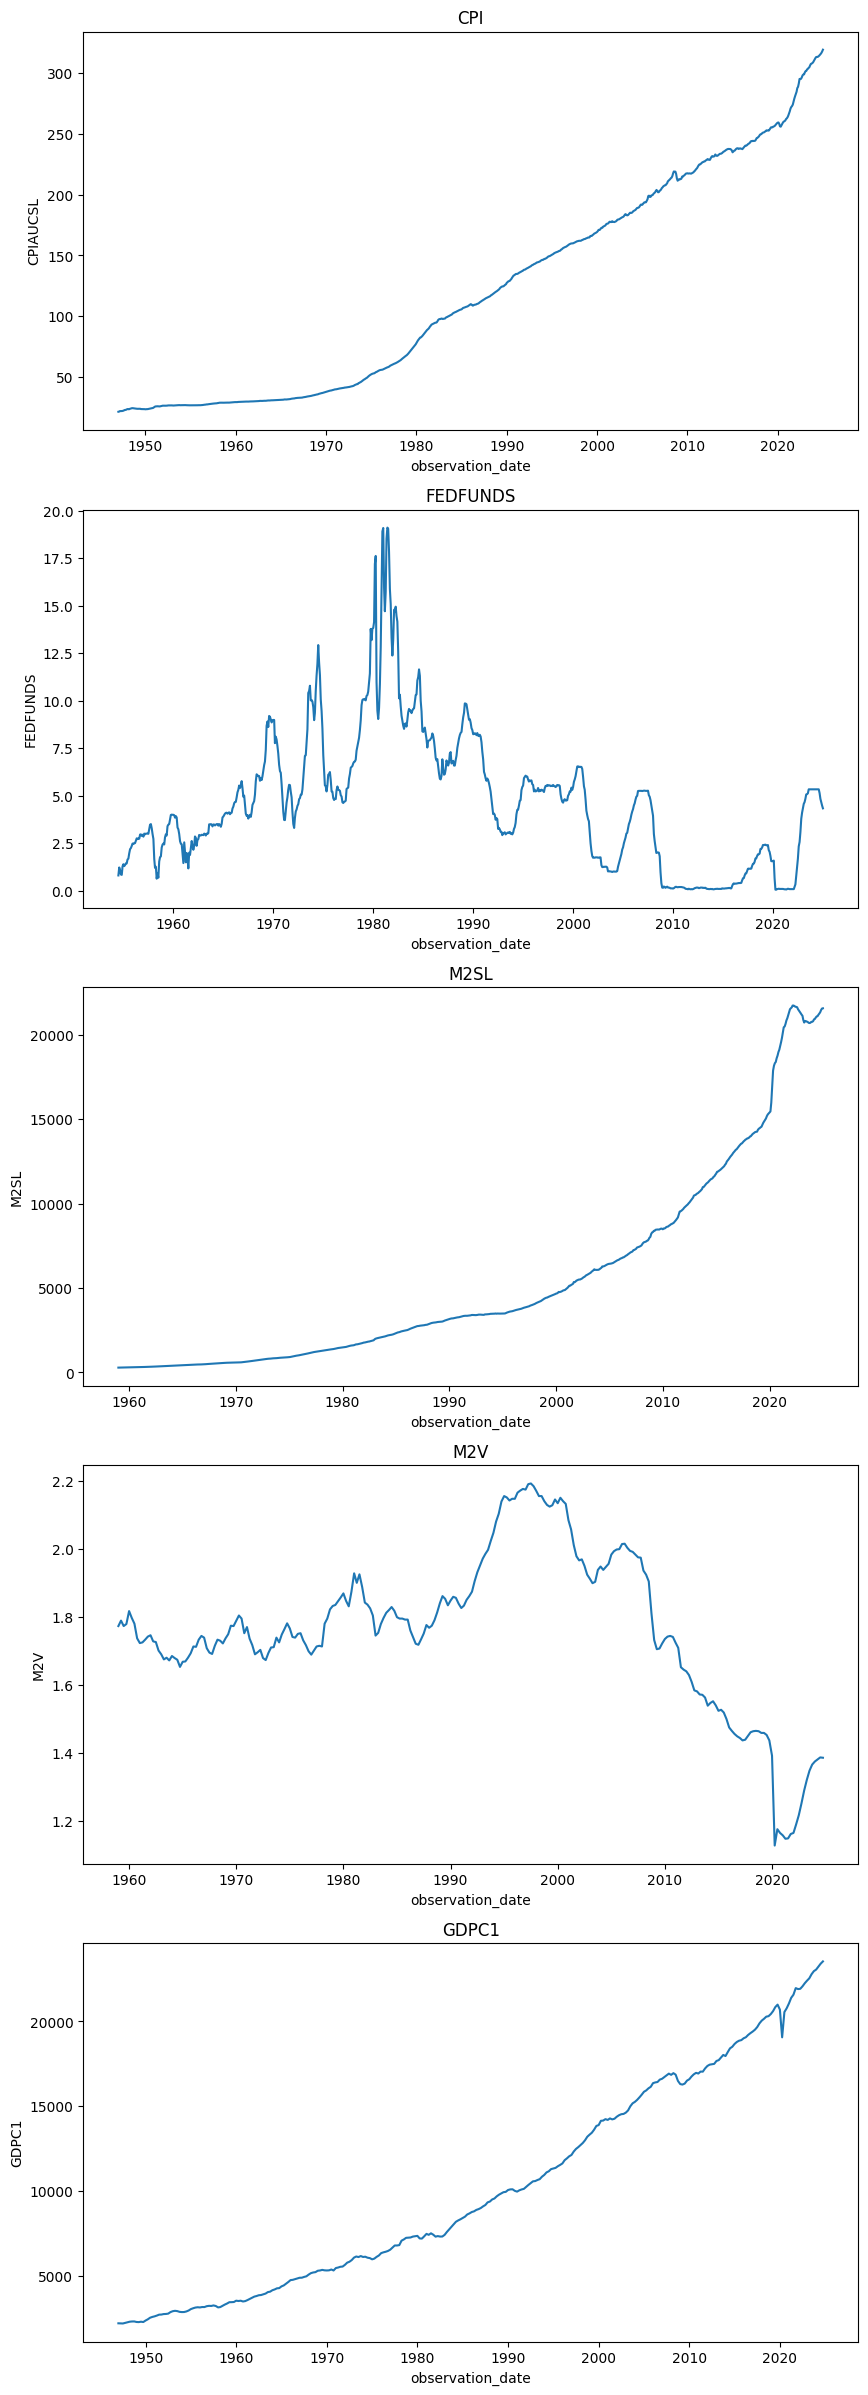

In [ ]:
# Plot the data to observe the years where it starts to have missing data
plt.figure(figsize=(10, 30))

plt.subplot(5, 1, 1)
sns.lineplot(data['CPIAUCSL'])
plt.title("CPI")

plt.subplot(5, 1, 2)
sns.lineplot(data['FEDFUNDS'])
plt.title("FEDFUNDS")

plt.subplot(5, 1, 3)
sns.lineplot(data['M2SL'])
plt.title("M2SL")

plt.subplot(5, 1, 4)
sns.lineplot(data['M2V'])
plt.title("M2V")

plt.subplot(5, 1, 5)
sns.lineplot(data['GDPC1'])
plt.title("GDPC1")


In [ ]:
# Slicing the data to include only the years of interest
data_sliced = data.loc["19600101":"20241001", :]
print(data_sliced)

                  CPIAUCSL  FEDFUNDS     M2SL    M2V      GDPC1
observation_date                                               
1960-01-01          29.370      3.99    298.2  1.817   3517.181
1960-02-01          29.410      3.97    298.4    NaN        NaN
1960-03-01          29.410      3.84    299.3    NaN        NaN
1960-04-01          29.540      3.92    300.1  1.797   3498.246
1960-05-01          29.570      3.85    300.9    NaN        NaN
...                    ...       ...      ...    ...        ...
2024-06-01         313.131      5.33  21079.2    NaN        NaN
2024-07-01         313.566      5.33  21093.6  1.387  23400.294
2024-08-01         314.131      5.33  21182.5    NaN        NaN
2024-09-01         314.851      5.13  21252.4    NaN        NaN
2024-10-01         315.564      4.83  21332.7  1.386  23536.293

[778 rows x 5 columns]


In [ ]:
# Let's check again the number of missing values per column
data_sliced.isnull().sum()

,0
CPIAUCSL,0
FEDFUNDS,0
M2SL,0
M2V,518
GDPC1,518


In [ ]:
def missing_value_percentage(df):
    missing_count = df.isnull().sum()  # Count of missing values
    total_rows = len(df)  # Total number of rows
    missing_percent = (missing_count / total_rows) * 100  # Percentage calculation

    # Create a DataFrame to display results
    missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage': missing_percent})

    # Filter only columns with missing values
    missing_df = missing_df[missing_df['Missing Count'] > 0]
    return missing_df

In [ ]:
missing_value_percentage(data_sliced)

,Missing Count,Missing Percentage
M2V,518,66.580977
GDPC1,518,66.580977


In [ ]:
# describe() shows a quick statistic summary of your data
data_sliced.describe()

,CPIAUCSL,FEDFUNDS,M2SL,M2V,GDPC1
count,778.000000,778.000000,778.000000,260.000000,260.000000
mean,140.131022,4.799987,5468.928406,1.762988,11616.687962
std,82.810720,3.648065,5728.520281,0.231132,5772.246084
min,29.370000,0.050000,298.200000,1.128000,3470.278000
25%,56.025000,1.935000,1052.700000,1.683750,6358.431000
50%,139.900000,4.760000,3399.250000,1.752000,10398.551000
75%,212.943750,6.527500,7802.450000,1.904250,16637.096000
max,315.564000,19.100000,21724.300000,2.192000,23536.293000
